In [1]:
# Import necessary modules

import sys
import os

# Set root folder to project root
os.chdir(os.path.dirname(os.getcwd()))

# Add root folder to path
sys.path.append(os.getcwd())

import numpy as np
import pickle

from src.utils.plotting import plot_mazes
from src.utils.plotting import plot_diagram
from src.utils.tda import Analysis, get_betti_nums

In [2]:
# Load Analysis object
model_name = 'pi_net'
file_name = f'outputs/tda/analysis/{model_name}_maze_sizes-[9, 19, 29, 39, 49, 59, 69]_num_mazes-100_iters-3001,3400_embed_dim-0_delay-1.pkl'
with open(file_name, 'rb') as f:
    analysis = pickle.load(f)

analysis.print_time()

Time for analysis: 309.42min


In [7]:
# Count betti numbers
threshold = 0.2

from collections import Counter

# AFTER EXPERIMENT IS FINISHED
betti_nums = analysis.get_betti_nums(threshold=threshold)

# # BEFORE EXPERIMENT IS FINISHED
# completed_maze_sizes = len(analysis.maze_sizes) - 2
# betti_nums = np.zeros((completed_maze_sizes, analysis.num_mazes, analysis.max_homo+1), dtype=int)
# for i in range(completed_maze_sizes):
#     for j in range(analysis.num_mazes):
#         betti_nums[i, j] = get_betti_nums(analysis.diagrams[i, j], threshold)


# Print betti numbers for raw latent iterates
betti_nums_list = []
for i in range(len(betti_nums)):
    for j in range(len(betti_nums[i])):
        betti_nums_list.append(f'[{betti_nums[i,j,0]} {betti_nums[i,j,1]}]')

        if betti_nums[i,j,0] == 400 and betti_nums[i,j,1] == 0:
            print(f"{i} {j}: {betti_nums[i,j]}")
counter = Counter(betti_nums_list)
print()

# Print most common betti numbers in descending order of frequency
print(f"Betti numbers for raw latent iterates with threshold {threshold}:")
for value, count in counter.most_common():
    print(f"{value}: {count}")
print()



Betti numbers for raw latent iterates with threshold 0.2:
[1 0]: 700



In [8]:
import numpy as np
diagram = [np.array([[0, np.inf]]), np.zeros(shape=(0,2))]

(diagram[0] == [[0, np.inf]]).all() and (diagram[1] == np.zeros((0, 2))).all()

True

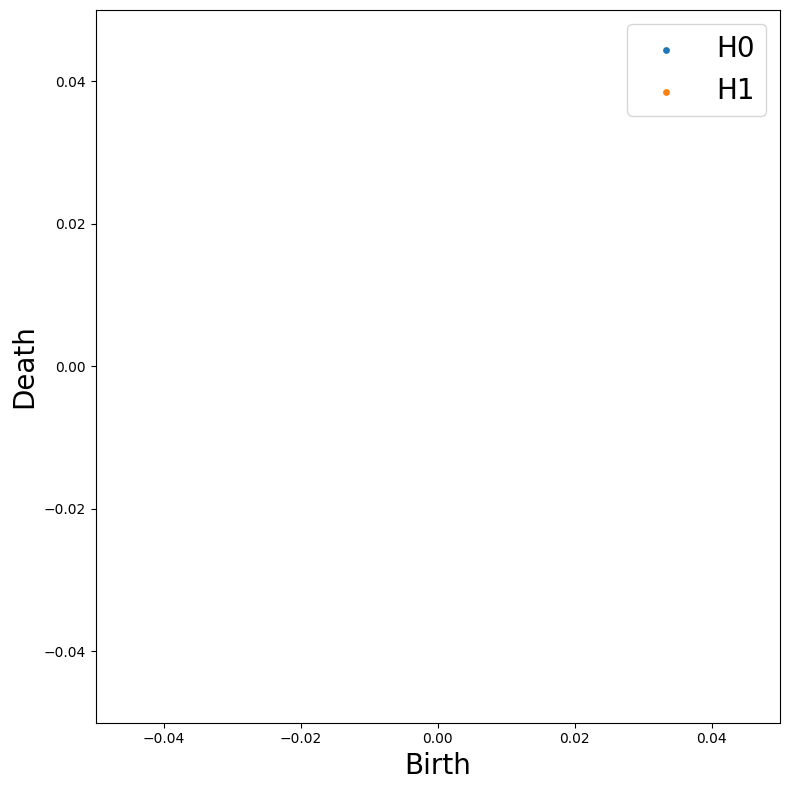

In [9]:
plot_diagram(analysis.diagrams[4,54], threshold=0.2);

In [10]:
# Plot frequency of betti numbers at each maze size
